In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ram_prices = pd.read_csv('ram_price.csv')
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


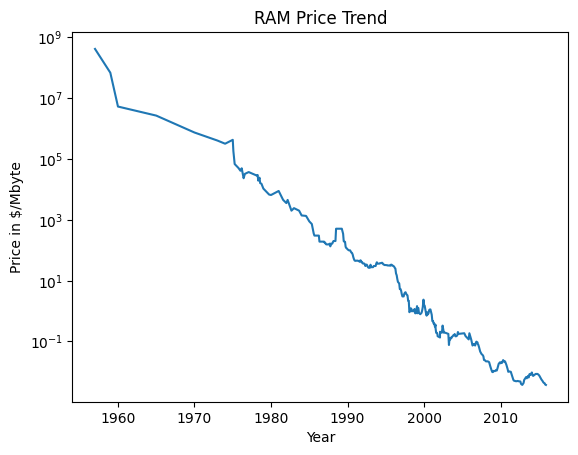

In [ ]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')
plt.title('RAM Price Trend')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# Predict prices based on date
X_train = data_train.date.values.reshape(-1, 1)  # Reshape to a 2D array
y_train = np.log(data_train.price)  # Apply log-transform to target variable

# Fit decision tree regressor and linear regression models
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# Predict on all data
X_all = ram_prices.date.values.reshape(-1, 1)  # Reshape to a 2D array
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# Undo log-transform to obtain actual prices
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

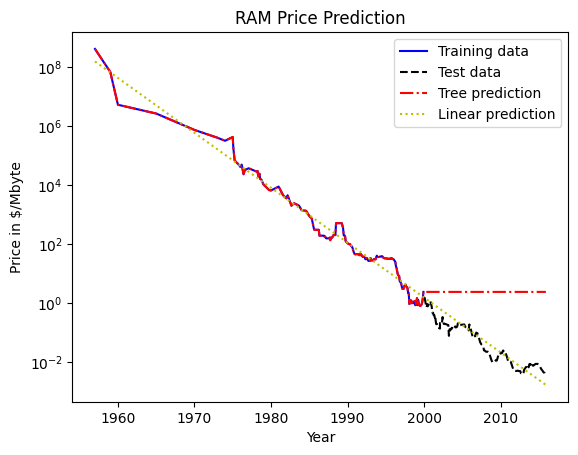

In [ ]:
# Plot the data with different line styles
plt.semilogy(data_train.date, data_train.price, linestyle='-', label='Training data', color='b')  # solid line
plt.semilogy(data_test.date, data_test.price, linestyle='--', label='Test data', color='k')  # dashed line
plt.semilogy(ram_prices.date, price_tree, linestyle='-.', label='Tree prediction', color='r')  # dash-dot line
plt.semilogy(ram_prices.date, price_lr, linestyle=':', label='Linear prediction', color='y')  # dotted line

# Add legend and display the plot
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')
plt.title('RAM Price Prediction')
plt.show()
